## Logistic Regression for Imbalanced Dataset


In [2]:
# Generate 
from collections import Counter
from sklearn.datasets import make_classification




In [ ]:
## Imbalance datasets
X,y=make_classification(n_samples=10000 , n_features=2 , n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)
# n_samples=10000  - > No. of datapoints in the dataset f
#  n_features=2  # no. of output feature binary 
#  n_clusters_per_class=1 # no. of clusters 
#  n_redundant=0
#  weights=[0.99] parameter for imbalanced dataset 
#  random_state=10

In [4]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [5]:
Counter(y)

Counter({0: 9846, 1: 154})

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

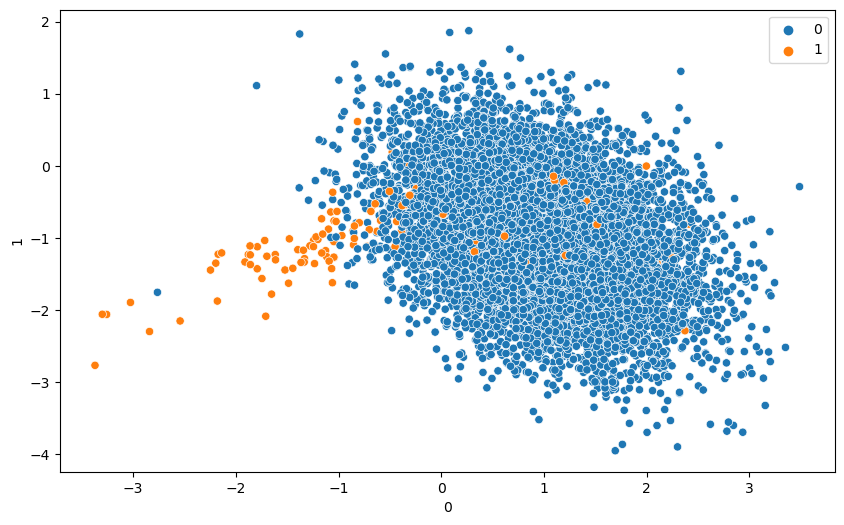

In [ ]:
# plotting imbalace dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Scatterplot of First Two Features with Churn Hue")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
# Hyperparameter tunning Logistic for imabalanced

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weights=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
# in class weight there are two values - dict or balanced 
# in balanced i will consider equal importance for both 0s and 1s . this is used when out dataset is balanced 


In [16]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weights)

In [17]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold()
grid=GridSearchCV(estimator=model, param_grid=params, scoring='accuracy',cv=cv)

In [19]:
grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [21]:
y_pred=grid.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_pred,y_test)
print("accuracy_score",score)
cm=confusion_matrix(y_pred,y_test)
print("confusion Matrix: \n",cm)
print(classification_report(y_pred,y_test))

accuracy_score 0.992
confusion Matrix: 
 [[2468   18]
 [   2   12]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500



## Observation 
1. In Confusion Matrix the diagonal elements are correctly placed as they are True positive and True Negative 
2. But the pther elements are incorrectly placed they are 18 , 2

